<a href="https://colab.research.google.com/github/Vrushti-kulkarni/Introduction--DL/blob/main/ML2_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
from google.colab import  drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
df = pd.read_csv('/content/drive/MyDrive/datasets/heart_failure_clinical_records.csv')

In [80]:
df.shape

(5000, 13)

In [81]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


{'whiskers': [<matplotlib.lines.Line2D at 0x780b8d2e2020>,
 'caps': [<matplotlib.lines.Line2D at 0x780b8d2e3c40>,
 'boxes': [<matplotlib.lines.Line2D at 0x780b8d2e2f50>],
 'medians': [<matplotlib.lines.Line2D at 0x780b8d2e0b20>],
 'fliers': [<matplotlib.lines.Line2D at 0x780b8cca9a50>],
 'means': []}

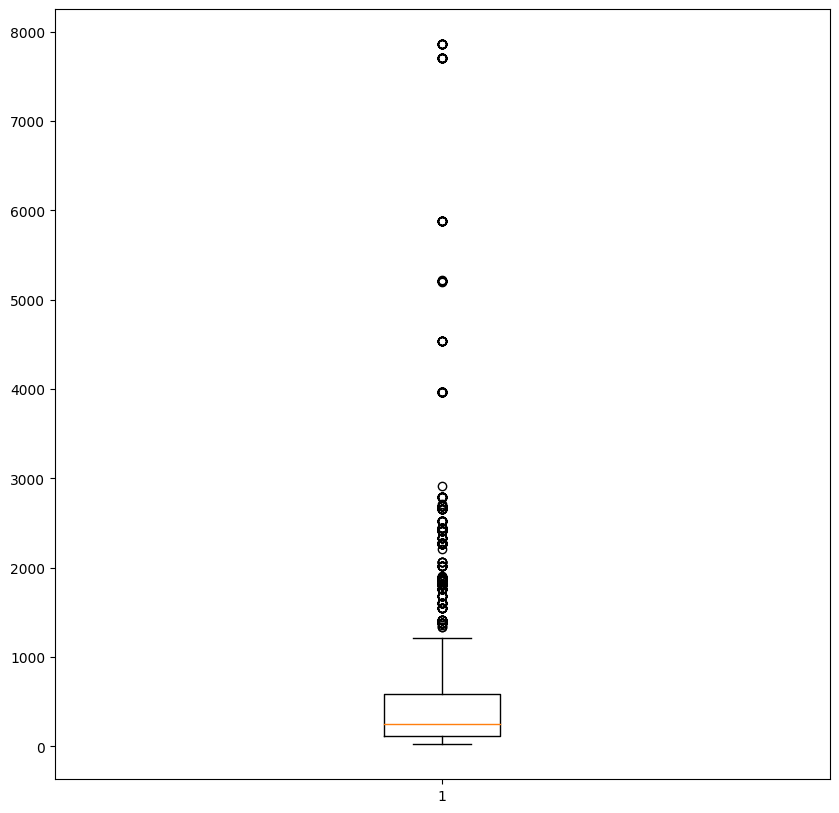

In [82]:
plt.figure(figsize=(10,10))
plt.boxplot(df['creatinine_phosphokinase'])

**FIND IQR**

In [83]:
perce25 = df['creatinine_phosphokinase'].quantile(0.25)
perce75 = df['creatinine_phosphokinase'].quantile(0.75)

In [84]:
I = perce75 - perce25

In [85]:
ub = perce75 + 1.5*I
lb = perce25 - 1.5*I

In [86]:
df = df.loc[df['creatinine_phosphokinase'] < ub]

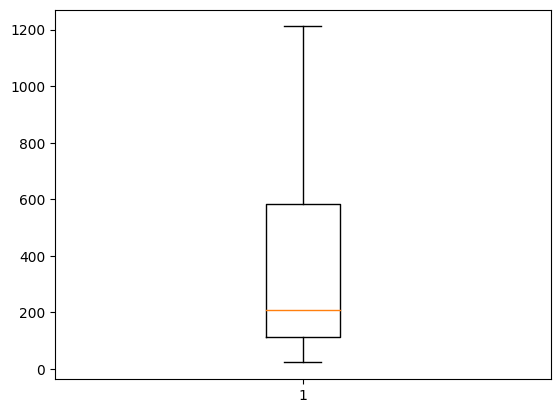

In [87]:
plt.boxplot(df['creatinine_phosphokinase'])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x780b8d0fc2e0>,
 'caps': [<matplotlib.lines.Line2D at 0x780b8d0fc820>,
 'boxes': [<matplotlib.lines.Line2D at 0x780b8d0fc040>],
 'medians': [<matplotlib.lines.Line2D at 0x780b8d0fcd60>],
 'fliers': [<matplotlib.lines.Line2D at 0x780b8d0fd000>],
 'means': []}

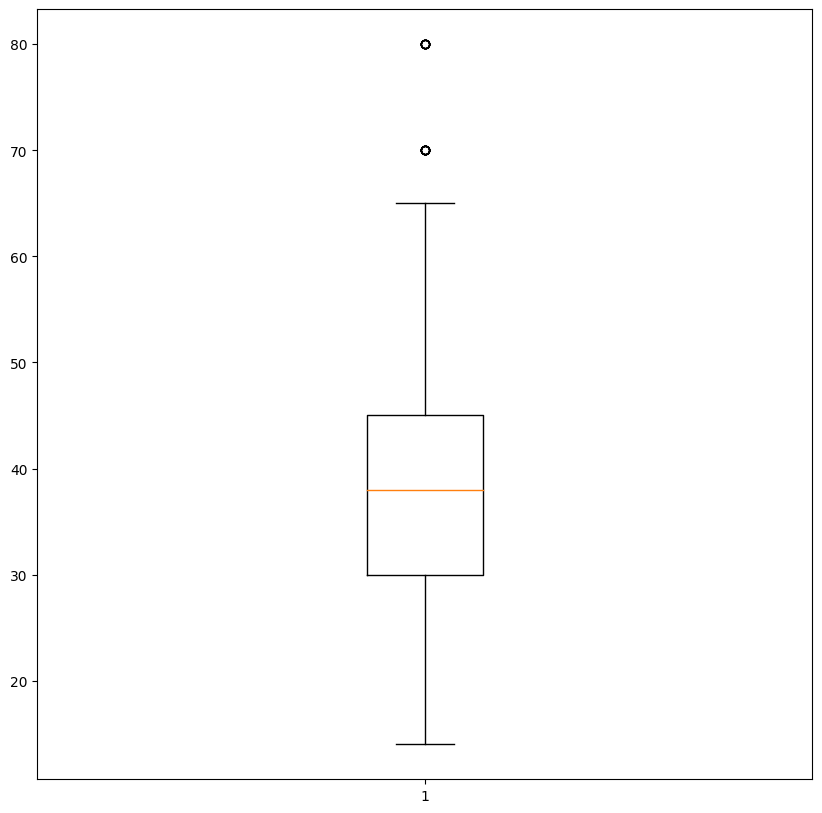

In [88]:
plt.figure(figsize=(10,10))
plt.boxplot(df['ejection_fraction'])

In [89]:
perce25 = df['ejection_fraction'].quantile(0.25)
perce75 = df['ejection_fraction'].quantile(0.75)

In [90]:
I = perce75 - perce25

In [91]:
ub = perce75 + 1.5*I
lb = perce25 - 1.5*I

In [92]:
df = df.loc[df['ejection_fraction']< ub]

In [93]:
df.shape

(4488, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x780b8d0d86a0>,
 'caps': [<matplotlib.lines.Line2D at 0x780b8d0d8ac0>,
 'boxes': [<matplotlib.lines.Line2D at 0x780b8d0d8520>],
 'medians': [<matplotlib.lines.Line2D at 0x780b8d0d9000>],
 'fliers': [<matplotlib.lines.Line2D at 0x780b8d0d92a0>],
 'means': []}

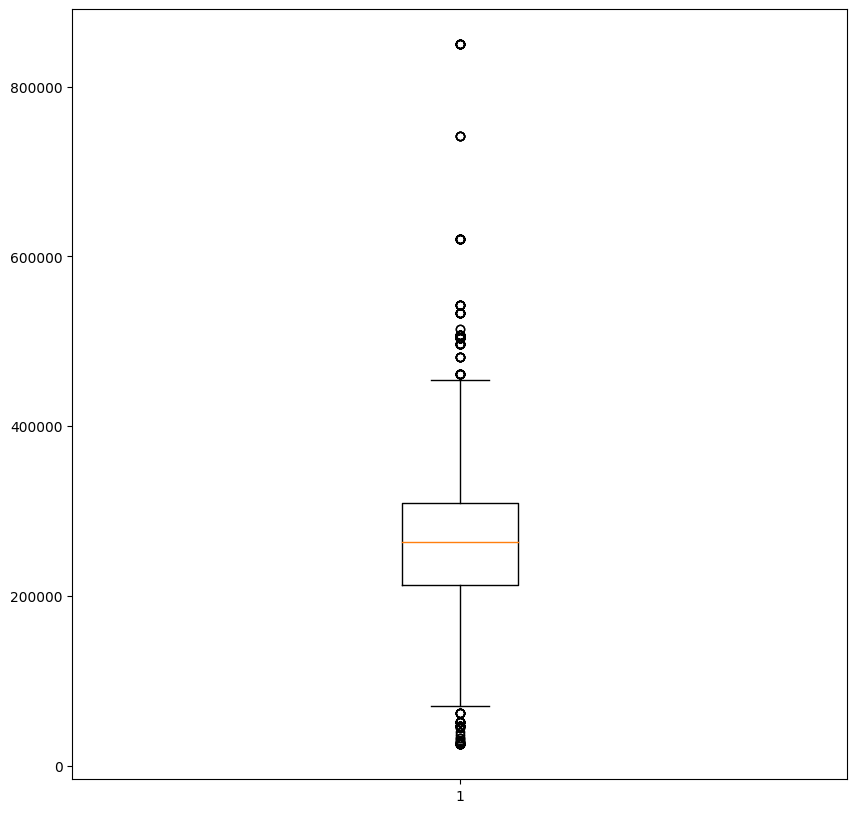

In [94]:
plt.figure(figsize=(10,10))
plt.boxplot(df['platelets'])

In [95]:
perce25 = df['platelets'].quantile(0.25)
perce75 = df['platelets'].quantile(0.75)

In [96]:
IQR = perce75 - perce25

In [97]:
ub = perce75 + 1.5*IQR
lb = perce25 - 1.5*IQR

In [98]:
df = df.loc[df['platelets'] < ub]
df = df.loc[df['platelets'] > lb]

In [99]:
df = df.loc[df['platelets'] < ub]
df = df.loc[df['platelets'] > lb]

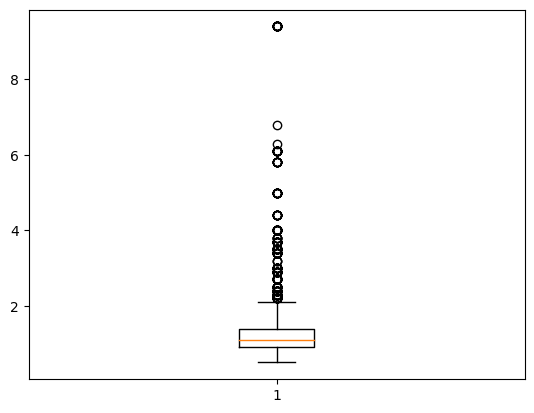

In [100]:
plt.boxplot(df['serum_creatinine'])
plt.show()

In [101]:
perce25 = df['serum_creatinine'].quantile(0.25)
perce75 = df['serum_creatinine'].quantile(0.75)

In [102]:
IQR = perce75 - perce25

In [103]:
ub = perce75 + 1.5*IQR
lb = perce25 - 1.5*IQR

In [104]:
df = df.loc[df['serum_creatinine'] < ub]
df = df.loc[df['serum_creatinine'] > lb]

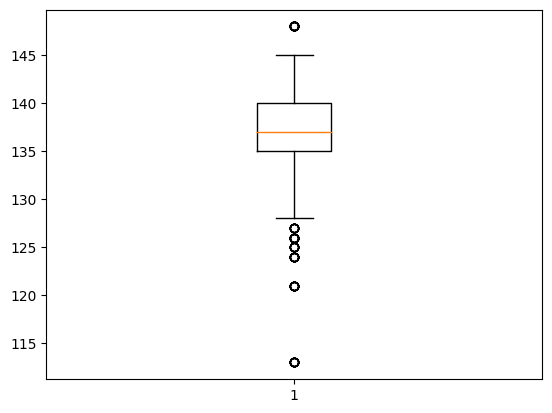

In [105]:
plt.boxplot(df['serum_sodium'])
plt.show()

In [106]:
perce25 = df['serum_sodium'].quantile(0.25)
perce75 = df['serum_sodium'].quantile(0.75)

In [107]:
IQR = perce75 - perce25

In [108]:
ub = perce75 + 1.5*IQR
lb = perce25 - 1.5*IQR

In [109]:
df = df.loc[df['serum_sodium'] < ub]
df = df.loc[df['serum_sodium'] > lb]

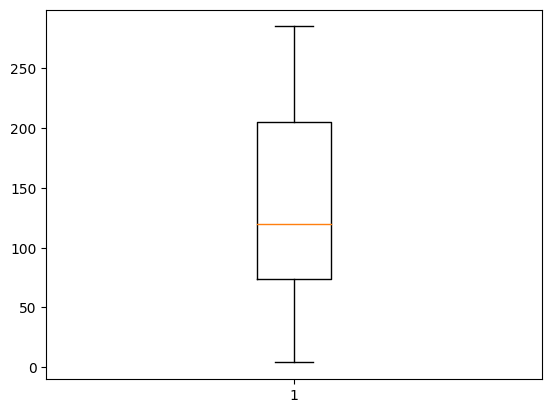

In [111]:
plt.boxplot(df['time'])
plt.show()

In [112]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
6,63.0,1,122,1,60,0,172000.00,1.2,145,0,0,147,0
7,70.0,1,171,0,50,1,358000.00,0.9,141,0,0,196,0


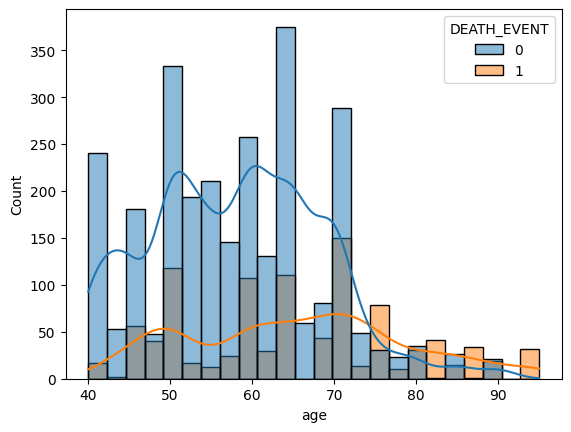

In [116]:
sns.histplot(data = df ,x = 'age', kde = True, hue = 'DEATH_EVENT')
plt.show()

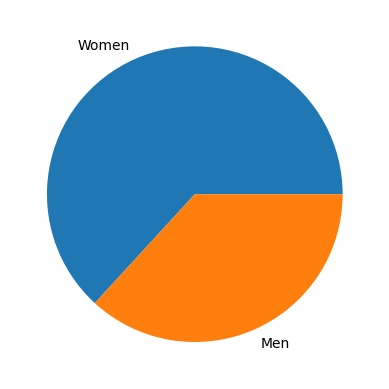

In [119]:
plt.pie(df['sex'].value_counts(), labels=['Women',"Men"])
plt.show()

In [124]:
df['sex'].value_counts()

,count
sex,
1,2392
0,1394


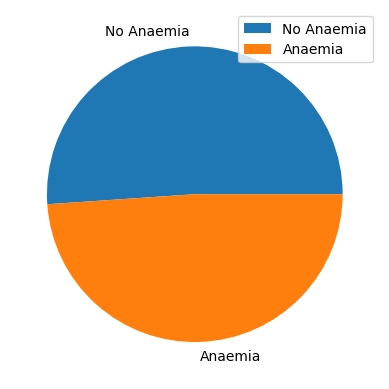

In [129]:
plt.pie(df['anaemia'].value_counts(), labels=['No Anaemia',"Anaemia"])
plt.legend()
plt.show()

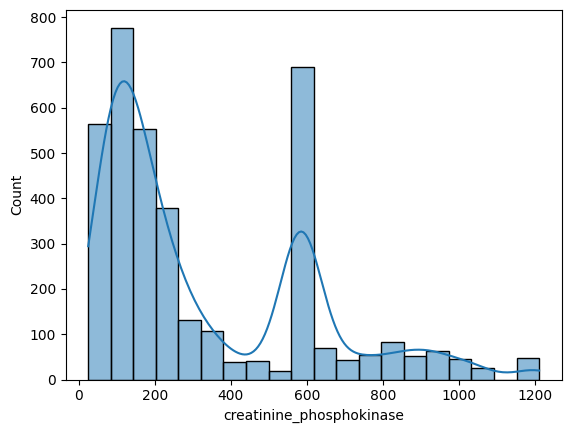

In [136]:
sns.histplot(df['creatinine_phosphokinase'], kde = True)
plt.show()

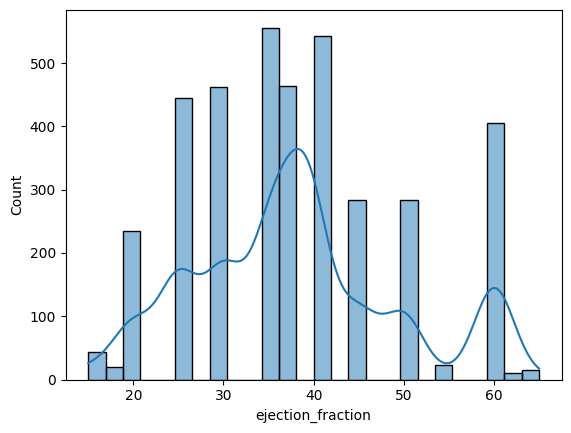

In [137]:
sns.histplot(df['ejection_fraction'], kde = True)
plt.show()

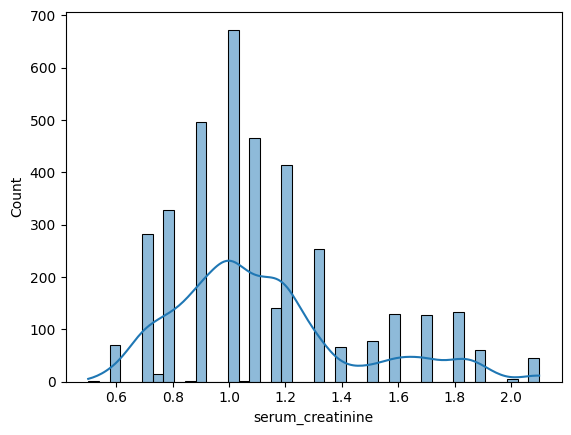

In [138]:
sns.histplot(df['serum_creatinine'], kde = True)
plt.show()

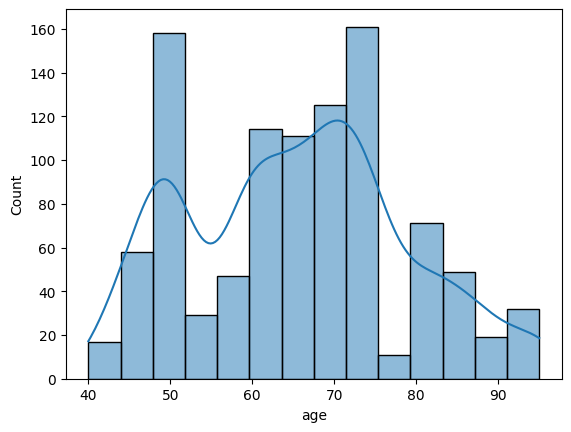

In [140]:
temp = df[df['DEATH_EVENT']==1]['age']
sns.histplot(temp, kde = True)
plt.show()

In [142]:
df['age'].describe()

,age
count,3786.000000
mean,60.035838
std,11.692545
min,40.000000
25%,50.000000
50%,60.000000
75%,68.000000
max,95.000000


most of the age data is concentrated between 50 to 70

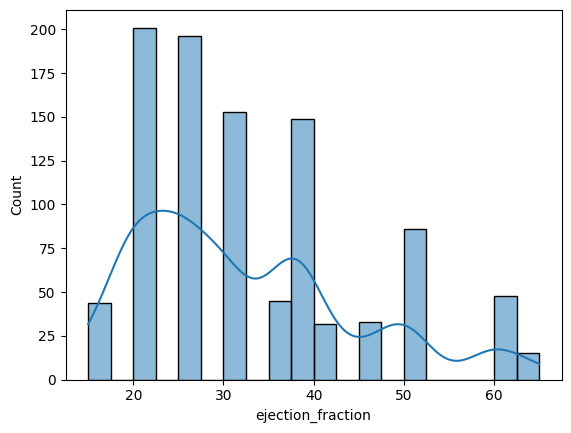

In [143]:
temp = df[df['DEATH_EVENT']==1]['ejection_fraction']
sns.histplot(temp, kde = True)
plt.show()

In [144]:
df['ejection_fraction'].describe()

,ejection_fraction
count,3786.000000
mean,37.905705
std,11.426352
min,15.000000
25%,30.000000
50%,38.000000
75%,45.000000
max,65.000000


# **ML model**

In [146]:
min_value = df['age'].min()
max_value = df['age'].max()

df['age'] = (df['age'] - (min_value))/(max_value - min_value)

In [147]:
min_value = df['ejection_fraction'].min()
max_value = df['ejection_fraction'].max()

df['ejection_fraction'] = (df['ejection_fraction'] - (min_value))/(max_value - min_value)

In [148]:
min_value = df['serum_creatinine'].min()
max_value = df['serum_creatinine'].max()

df['serum_creatinine'] = (df['serum_creatinine'] - (min_value))/(max_value - min_value)

In [149]:
min_value = df['time'].min()
max_value = df['time'].max()

df['time'] = (df['time'] - (min_value))/(max_value - min_value)

In [151]:
min_value = df['serum_sodium'].min()
max_value = df['serum_sodium'].max()

df['serum_sodium'] = (df['serum_sodium'] - (min_value))/(max_value - min_value)

In [152]:
min_value = df['platelets'].min()
max_value = df['platelets'].max()

df['platelets'] = (df['platelets'] - (min_value))/(max_value - min_value)

In [154]:
min_value = df['creatinine_phosphokinase'].min()
max_value = df['creatinine_phosphokinase'].max()

df['creatinine_phosphokinase'] = (df['creatinine_phosphokinase'] - (min_value))/(max_value - min_value)

In [157]:
print(len(df.loc[df['DEATH_EVENT']==0]))
print(len(df.loc[df['DEATH_EVENT']==1]))

2784
1002


# **oversampling**